In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
print(os.getcwd())
os.chdir("/Users/kittitat_t/Library/CloudStorage/OneDrive-Personal/[01] Kittitat/[02] ESDA/[91] Energy Data Analysis/Assignment /Data")

/Users/kittitat_t/Library/CloudStorage/OneDrive-Personal/[01] Kittitat/[02] ESDA/[91] Energy Data Analysis/Assignment /Code


In [3]:
electricity_prices = pd.read_csv('electricity_prices.csv')
electricity_prices

,forecast_date,euros_per_mwh,origin_date,data_block_id
0,2021-09-01 00:00:00,92.51,2021-08-31 00:00:00,1
1,2021-09-01 01:00:00,88.90,2021-08-31 01:00:00,1
2,2021-09-01 02:00:00,87.35,2021-08-31 02:00:00,1
3,2021-09-01 03:00:00,86.88,2021-08-31 03:00:00,1
4,2021-09-01 04:00:00,88.43,2021-08-31 04:00:00,1
...,...,...,...,...
15281,2023-05-30 19:00:00,82.10,2023-05-29 19:00:00,637
15282,2023-05-30 20:00:00,150.85,2023-05-29 20:00:00,637
15283,2023-05-30 21:00:00,82.10,2023-05-29 21:00:00,637
15284,2023-05-30 22:00:00,82.09,2023-05-29 22:00:00,637


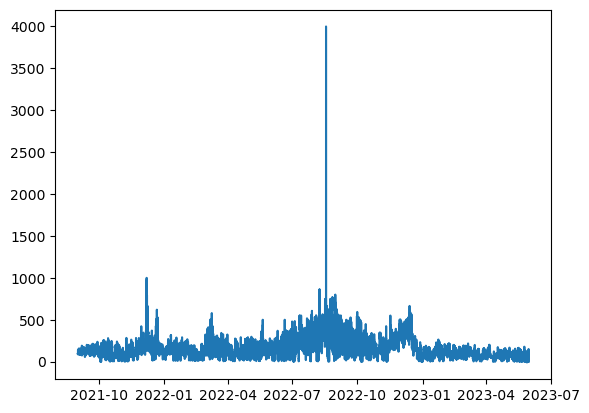

In [4]:
#cast forecast_date column to datetime
electricity_prices['forecast_date'] = pd.to_datetime(electricity_prices['forecast_date'])
plt.plot(electricity_prices['forecast_date'],electricity_prices['euros_per_mwh'])

In [5]:
electricity_prices.drop(columns=['origin_date'],inplace=True)
electricity_prices.rename(columns={'forecast_date':'forecast_date_electricity', 'data_block_id':'data_block_id_electricity'},inplace=True)
electricity_prices

,forecast_date_electricity,euros_per_mwh,data_block_id_electricity
0,2021-09-01 00:00:00,92.51,1
1,2021-09-01 01:00:00,88.90,1
2,2021-09-01 02:00:00,87.35,1
3,2021-09-01 03:00:00,86.88,1
4,2021-09-01 04:00:00,88.43,1
...,...,...,...
15281,2023-05-30 19:00:00,82.10,637
15282,2023-05-30 20:00:00,150.85,637
15283,2023-05-30 21:00:00,82.10,637
15284,2023-05-30 22:00:00,82.09,637


In [6]:
gas_prices = pd.read_csv('gas_prices.csv')
gas_prices['forecast_date'] = pd.to_datetime(gas_prices['forecast_date'])
gas_prices

,forecast_date,lowest_price_per_mwh,highest_price_per_mwh,origin_date,data_block_id
0,2021-09-01,45.23,46.32,2021-08-31,1
1,2021-09-02,45.62,46.29,2021-09-01,2
2,2021-09-03,45.85,46.40,2021-09-02,3
3,2021-09-04,46.30,46.80,2021-09-03,4
4,2021-09-05,46.30,46.58,2021-09-04,5
...,...,...,...,...,...
632,2023-05-26,29.10,34.10,2023-05-25,633
633,2023-05-27,28.30,34.10,2023-05-26,634
634,2023-05-28,28.10,34.10,2023-05-27,635
635,2023-05-29,28.16,36.98,2023-05-28,636


In [7]:
gas_prices.drop(columns=['origin_date'],inplace=True)
gas_prices

,forecast_date,lowest_price_per_mwh,highest_price_per_mwh,data_block_id
0,2021-09-01,45.23,46.32,1
1,2021-09-02,45.62,46.29,2
2,2021-09-03,45.85,46.40,3
3,2021-09-04,46.30,46.80,4
4,2021-09-05,46.30,46.58,5
...,...,...,...,...
632,2023-05-26,29.10,34.10,633
633,2023-05-27,28.30,34.10,634
634,2023-05-28,28.10,34.10,635
635,2023-05-29,28.16,36.98,636


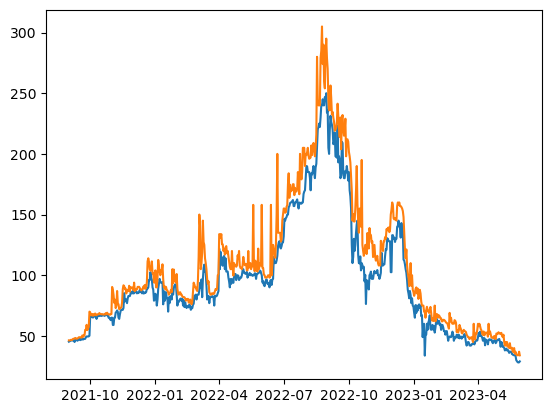

In [8]:
plt.plot(gas_prices['forecast_date'],gas_prices['lowest_price_per_mwh'])
plt.plot(gas_prices['forecast_date'],gas_prices['highest_price_per_mwh'])
plt.show()

In [9]:
print(gas_prices.shape)
print(electricity_prices.shape)
print(gas_prices.columns)
print(electricity_prices.columns)

(637, 4)
(15286, 3)
Index(['forecast_date', 'lowest_price_per_mwh', 'highest_price_per_mwh',
       'data_block_id'],
      dtype='object')
Index(['forecast_date_electricity', 'euros_per_mwh',
       'data_block_id_electricity'],
      dtype='object')


In [10]:
electricity_prices['forecast_date_electricity'] = pd.to_datetime(electricity_prices['forecast_date_electricity'])
gas_prices['forecast_date'] = pd.to_datetime(gas_prices['forecast_date'])
electricity_prices['date'] =  pd.to_datetime(electricity_prices['forecast_date_electricity']).dt.date

In [11]:
#merge the price together
electricity_prices['date'] = pd.to_datetime(electricity_prices['date'])
merged_price = pd.merge(
    electricity_prices,
    gas_prices,
    left_on=['date', 'data_block_id_electricity'],
    right_on=['forecast_date', 'data_block_id'],
    how='left'
)

In [12]:
print(merged_price.isna().sum())
print(merged_price.head())

forecast_date_electricity    0
euros_per_mwh                0
data_block_id_electricity    0
date                         0
forecast_date                0
lowest_price_per_mwh         0
highest_price_per_mwh        0
data_block_id                0
dtype: int64
  forecast_date_electricity  euros_per_mwh  data_block_id_electricity  \
0       2021-09-01 00:00:00          92.51                          1   
1       2021-09-01 01:00:00          88.90                          1   
2       2021-09-01 02:00:00          87.35                          1   
3       2021-09-01 03:00:00          86.88                          1   
4       2021-09-01 04:00:00          88.43                          1   

        date forecast_date  lowest_price_per_mwh  highest_price_per_mwh  \
0 2021-09-01    2021-09-01                 45.23                  46.32   
1 2021-09-01    2021-09-01                 45.23                  46.32   
2 2021-09-01    2021-09-01                 45.23                  46.32   


In [13]:
merged_price.drop(columns=['forecast_date','data_block_id_electricity'],inplace=True)
merged_price = merged_price[['forecast_date_electricity','date','euros_per_mwh','lowest_price_per_mwh','highest_price_per_mwh','data_block_id']]
merged_price
#merged_price -> no missing value, fully merged

,forecast_date_electricity,date,euros_per_mwh,lowest_price_per_mwh,highest_price_per_mwh,data_block_id
0,2021-09-01 00:00:00,2021-09-01,92.51,45.23,46.32,1
1,2021-09-01 01:00:00,2021-09-01,88.90,45.23,46.32,1
2,2021-09-01 02:00:00,2021-09-01,87.35,45.23,46.32,1
3,2021-09-01 03:00:00,2021-09-01,86.88,45.23,46.32,1
4,2021-09-01 04:00:00,2021-09-01,88.43,45.23,46.32,1
...,...,...,...,...,...,...
15281,2023-05-30 19:00:00,2023-05-30,82.10,29.00,34.00,637
15282,2023-05-30 20:00:00,2023-05-30,150.85,29.00,34.00,637
15283,2023-05-30 21:00:00,2023-05-30,82.10,29.00,34.00,637
15284,2023-05-30 22:00:00,2023-05-30,82.09,29.00,34.00,637


In [14]:
historical_weather = pd.read_csv('historical_weather.csv')
historical_weather['datetime'] = pd.to_datetime(historical_weather['datetime'])
historical_weather

,datetime,temperature,dewpoint,rain,snowfall,surface_pressure,cloudcover_total,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,winddirection_10m,shortwave_radiation,direct_solar_radiation,diffuse_radiation,latitude,longitude,data_block_id
0,2021-09-01 00:00:00,14.2,11.6,0.0,0.0,1015.9,31,31,0,11,7.083333,8,0.0,0.0,0.0,57.6,21.7,1.0
1,2021-09-01 00:00:00,13.9,11.5,0.0,0.0,1010.7,33,37,0,0,5.111111,359,0.0,0.0,0.0,57.6,22.2,1.0
2,2021-09-01 00:00:00,14.0,12.5,0.0,0.0,1015.0,31,34,0,0,6.333333,355,0.0,0.0,0.0,57.6,22.7,1.0
3,2021-09-01 00:00:00,14.6,11.5,0.0,0.0,1017.3,0,0,0,0,8.083333,297,358.0,277.0,81.0,57.6,23.2,1.0
4,2021-09-01 00:00:00,15.7,12.9,0.0,0.0,1014.0,22,25,0,0,8.416667,5,0.0,0.0,0.0,57.6,23.7,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710797,2023-05-30 10:00:00,11.7,4.6,0.0,0.0,1018.9,40,9,54,0,1.055556,253,567.0,392.0,175.0,59.7,26.2,637.0
1710798,2023-05-30 10:00:00,12.3,3.5,0.0,0.0,1019.0,46,4,70,0,0.805556,263,581.0,407.0,174.0,59.7,26.7,637.0
1710799,2023-05-30 10:00:00,9.8,3.0,0.0,0.0,1019.2,41,4,62,0,1.972222,285,609.0,432.0,177.0,59.7,27.2,637.0
1710800,2023-05-30 10:00:00,11.7,1.6,0.0,0.0,1019.0,44,0,73,0,3.500000,307,658.0,521.0,137.0,59.7,27.7,637.0


In [15]:
print(historical_weather.shape)

(1710802, 18)


In [16]:
weather_stations = pd.read_csv('weather_station_to_county_mapping.csv')
print(weather_stations.value_counts('county').sort_index())
print(weather_stations['county'].notna().sum())

county
0.0     6
1.0     1
2.0     4
3.0     3
4.0     3
5.0     4
6.0     2
7.0     5
8.0     1
9.0     3
10.0    4
11.0    4
13.0    1
14.0    3
15.0    5
dtype: int64
49


In [17]:
weather_stations_2 = pd.read_csv('test_location_result_2.csv')
print(weather_stations_2.value_counts('county').sort_index())
print(weather_stations_2['county'].notna().sum())
#-> gahter more data from other sources

county
0     10
1      5
2      4
3      3
4      4
5      6
6      4
7      9
8      1
9      3
10     9
11     4
13     1
14     3
15     5
dtype: int64
71


In [18]:
weather_stations_2.head()

,county_name,longitude,latitude,county
0,Harjumaa,23.7,59.4,0
1,Harjumaa,24.2,59.1,0
2,Harjumaa,24.2,59.4,0
3,Harjumaa,24.7,59.4,0
4,Harjumaa,24.7,59.7,0


In [19]:
merge_weather = pd.merge(historical_weather, weather_stations_2, on=['latitude','longitude'], how='left')
merge_weather.shape

(1710802, 20)

In [20]:
#weahter data before gathering

print(merge_weather['county_name'].isna().sum()  / len(merge_weather)*100)

36.60715851396012


In [21]:
#weahter data after gathering
merge_weather_test = pd.merge(historical_weather, weather_stations, on=['latitude','longitude'], how='left')
print(merge_weather_test['county_name'].isna().sum()  / len(merge_weather_test)*100)

88.39287071209877


In [22]:
#drop weather na
merge_weather = merge_weather.dropna()
merge_weather.head()

,datetime,temperature,dewpoint,rain,snowfall,surface_pressure,cloudcover_total,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,winddirection_10m,shortwave_radiation,direct_solar_radiation,diffuse_radiation,latitude,longitude,data_block_id,county_name,county
3,2021-09-01,14.6,11.5,0.0,0.0,1017.3,0,0,0,0,8.083333,297,358.0,277.0,81.0,57.6,23.2,1.0,Saaremaa,10.0
10,2021-09-01,13.0,11.5,0.0,0.0,998.5,100,85,17,98,4.027778,354,0.0,0.0,0.0,57.6,26.7,1.0,Võrumaa,15.0
11,2021-09-01,13.0,12.1,0.1,0.0,988.9,100,100,39,99,3.805556,360,0.0,0.0,0.0,57.6,27.2,1.0,Võrumaa,15.0
15,2021-09-01,14.4,11.3,0.0,0.0,1016.2,51,35,0,64,7.611111,5,0.0,0.0,0.0,57.9,22.2,1.0,Saaremaa,10.0
17,2021-09-01,15.5,12.7,0.0,0.0,1014.6,32,36,0,0,8.916667,356,0.0,0.0,0.0,57.9,23.2,1.0,Saaremaa,10.0


/var/folders/d0/y80mlsk526nbkcmm57mgpfyr0000gn/T/ipykernel_70615/1872515868.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_data = merge_weather.resample('D').mean()


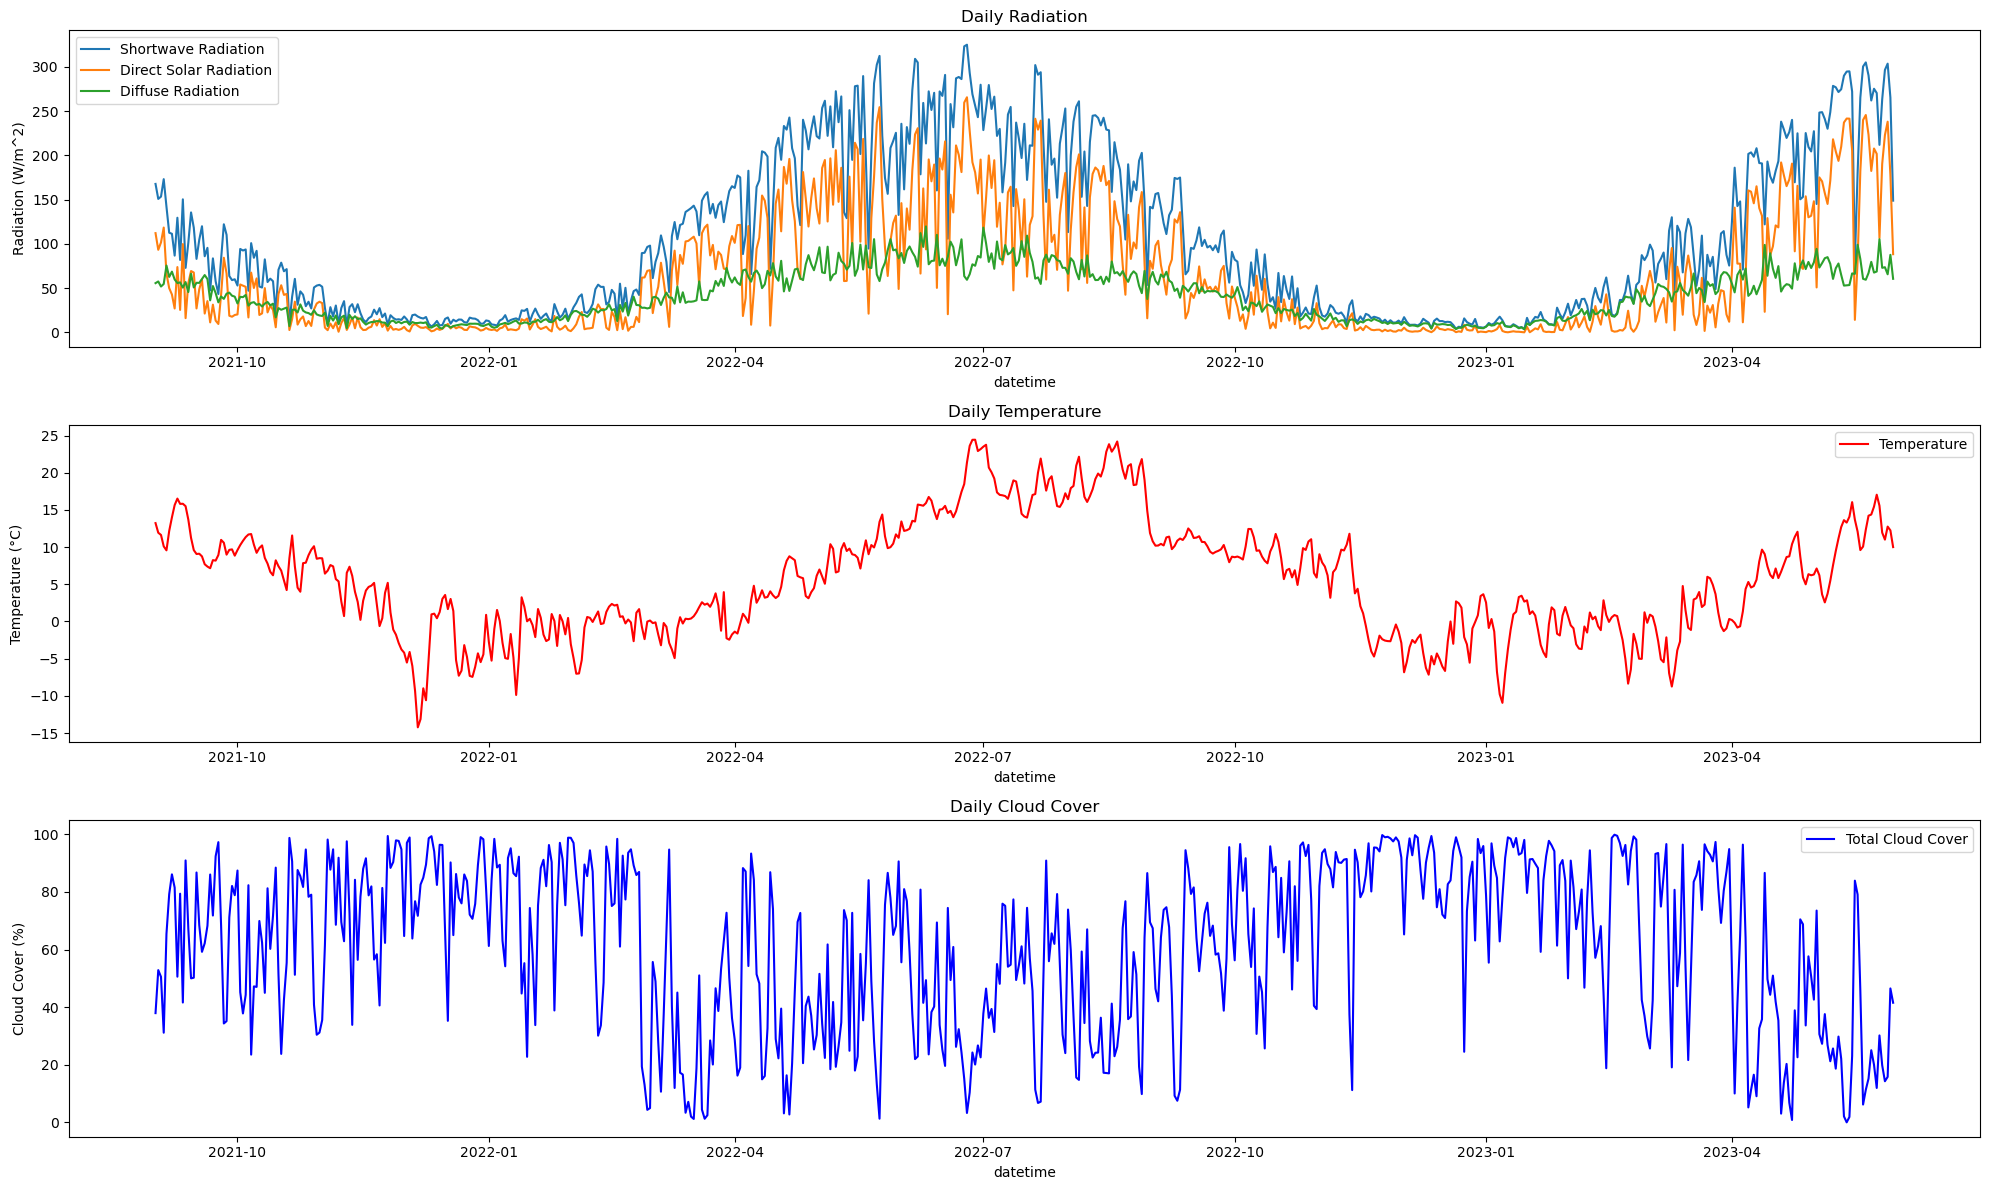

In [23]:
import seaborn as sns

# Convert the 'datetime' column to datetime objects
merge_weather['datetime'] = pd.to_datetime(merge_weather['datetime'])

# Set the 'datetime' column as the index
merge_weather.set_index('datetime', inplace=True)

# Assuming you want to visualize daily trends, resample the data by day
daily_data = merge_weather.resample('D').mean()

# Start a figure
plt.figure(figsize=(20, 12))

# Plot solar radiation
plt.subplot(3, 1, 1)
sns.lineplot(data=daily_data, x=daily_data.index, y='shortwave_radiation', label='Shortwave Radiation')
sns.lineplot(data=daily_data, x=daily_data.index, y='direct_solar_radiation', label='Direct Solar Radiation')
sns.lineplot(data=daily_data, x=daily_data.index, y='diffuse_radiation', label='Diffuse Radiation')
plt.title('Daily Radiation')
plt.ylabel('Radiation (W/m^2)')
plt.legend()

# Plot temperature
plt.subplot(3, 1, 2)
sns.lineplot(data=daily_data, x=daily_data.index, y='temperature', color='r', label='Temperature')
plt.title('Daily Temperature')
plt.ylabel('Temperature (°C)')

# Plot cloud cover
plt.subplot(3, 1, 3)
sns.lineplot(data=daily_data, x=daily_data.index, y='cloudcover_total', color='b', label='Total Cloud Cover')
plt.title('Daily Cloud Cover')
plt.ylabel('Cloud Cover (%)')

# Adjust the layout
plt.tight_layout()
plt.show()

In [24]:
train = pd.read_csv("train.csv")
train['date'] = pd.to_datetime(train['datetime']).dt.date
train

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id,date
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0,2021-09-01
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0,2021-09-01
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1,2021-09-01
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1,2021-09-01
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2,2021-09-01
...,...,...,...,...,...,...,...,...,...,...
2018347,15,1,0,197.233,1,2023-05-31 23:00:00,637,2018347,64,2023-05-31
2018348,15,1,1,0.000,0,2023-05-31 23:00:00,637,2018348,59,2023-05-31
2018349,15,1,1,28.404,1,2023-05-31 23:00:00,637,2018349,59,2023-05-31
2018350,15,1,3,0.000,0,2023-05-31 23:00:00,637,2018350,60,2023-05-31


In [25]:
client = pd.read_csv('client.csv')
client['date'] = pd.to_datetime(client['date'])
client

,product_type,county,eic_count,installed_capacity,is_business,date,data_block_id
0,1,0,108,952.89,0,2021-09-01,2
1,2,0,17,166.40,0,2021-09-01,2
2,3,0,688,7207.88,0,2021-09-01,2
3,0,0,5,400.00,1,2021-09-01,2
4,1,0,43,1411.00,1,2021-09-01,2
...,...,...,...,...,...,...,...
41914,1,15,51,415.60,0,2023-05-29,637
41915,3,15,161,2035.75,0,2023-05-29,637
41916,0,15,15,620.00,1,2023-05-29,637
41917,1,15,20,624.50,1,2023-05-29,637


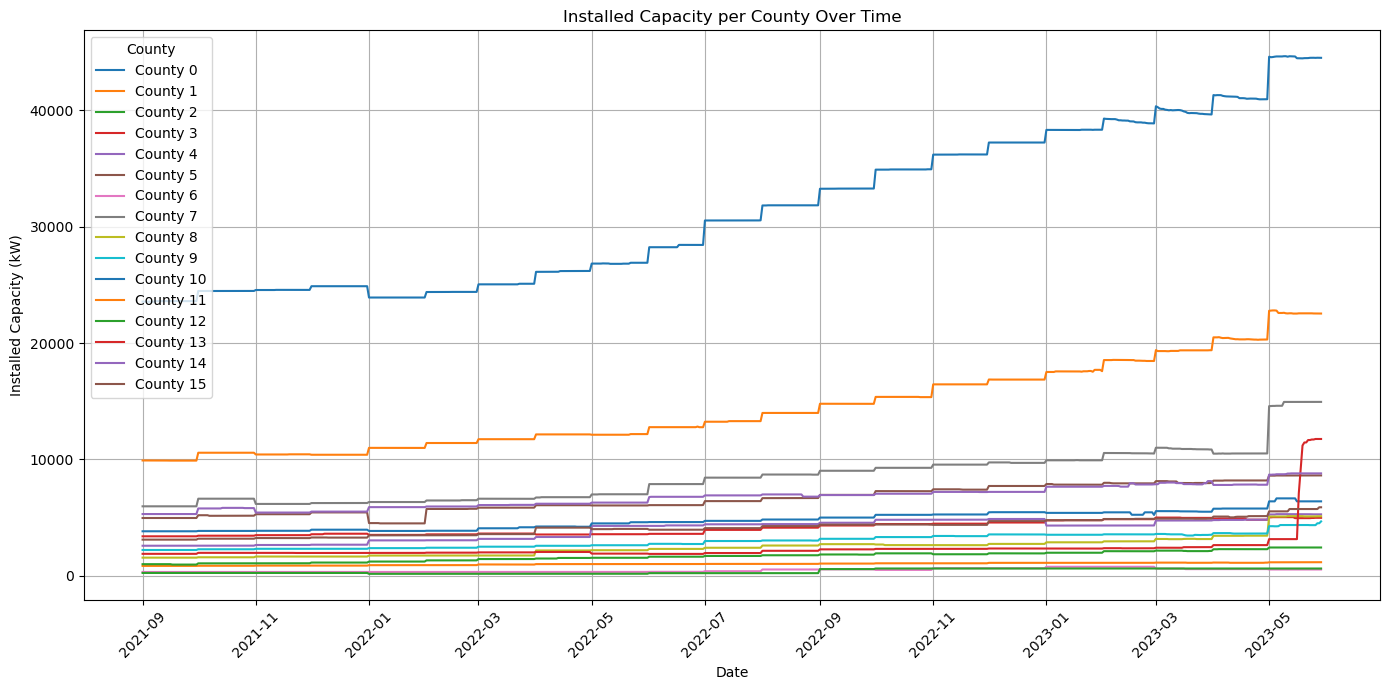

In [26]:
installed_capacity_per_day_county = client.groupby([client['date'].dt.date, 'county'])['installed_capacity'].sum().unstack().fillna(0)

# Plotting
plt.figure(figsize=(14, 7))

# Plot each county's installed capacity over time
for county in installed_capacity_per_day_county.columns:
    plt.plot(installed_capacity_per_day_county.index, installed_capacity_per_day_county[county], label=f'County {county}')

plt.title('Installed Capacity per County Over Time')
plt.xlabel('Date')
plt.ylabel('Installed Capacity (kW)')
plt.legend(title='County')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

# Show the plot
plt.show()

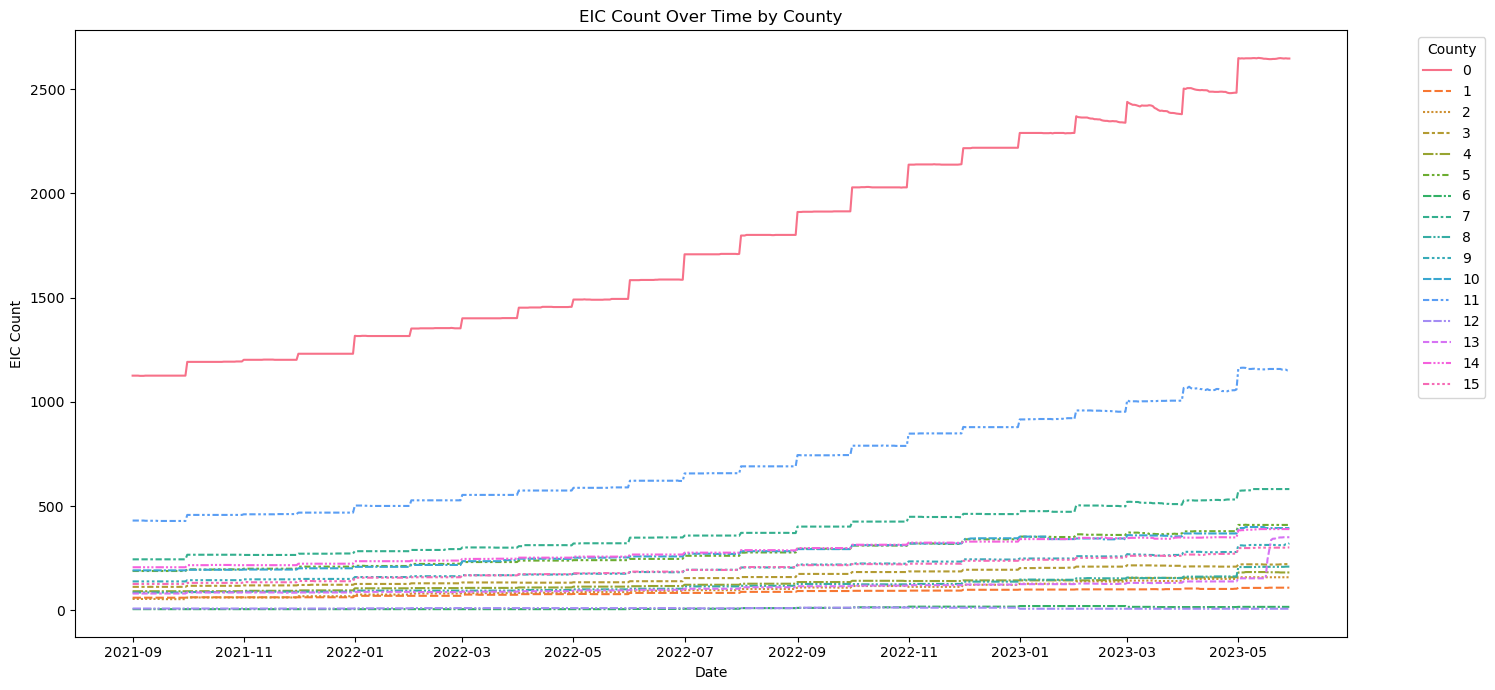

In [27]:
eic_count_over_time = client.groupby(['date', 'county']).agg({'eic_count': 'sum'}).reset_index()

# Pivot the table to get 'date' as index, columns as 'county', and 'eic_count' as values
eic_count_pivot = eic_count_over_time.pivot(index='date', columns='county', values='eic_count').fillna(0)

# Plotting eic_count over time for all counties
plt.figure(figsize=(15, 7))
sns.lineplot(data=eic_count_pivot)
plt.title('EIC Count Over Time by County')
plt.xlabel('Date')
plt.ylabel('EIC Count')
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

In [28]:
client['date'] = pd.to_datetime(client['date'])
train['date'] = pd.to_datetime(train['date'])
merge_step1 = pd.merge(train, client, 
                       on = ['county','is_business','product_type','date'],
                       how='left')

In [29]:
merge_step1[merge_step1['eic_count'].isna()]

,county,is_business,product_type,target,is_consumption,datetime,data_block_id_x,row_id,prediction_unit_id,date,eic_count,installed_capacity,data_block_id_y
2012112,0,0,1,4.394,0,2023-05-30 00:00:00,636,2012112,0,2023-05-30,NaN,NaN,NaN
2012113,0,0,1,461.672,1,2023-05-30 00:00:00,636,2012113,0,2023-05-30,NaN,NaN,NaN
2012114,0,0,2,0.000,0,2023-05-30 00:00:00,636,2012114,1,2023-05-30,NaN,NaN,NaN
2012115,0,0,2,5.496,1,2023-05-30 00:00:00,636,2012115,1,2023-05-30,NaN,NaN,NaN
2012116,0,0,3,19.154,0,2023-05-30 00:00:00,636,2012116,2,2023-05-30,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018347,15,1,0,197.233,1,2023-05-31 23:00:00,637,2018347,64,2023-05-31,NaN,NaN,NaN
2018348,15,1,1,0.000,0,2023-05-31 23:00:00,637,2018348,59,2023-05-31,NaN,NaN,NaN
2018349,15,1,1,28.404,1,2023-05-31 23:00:00,637,2018349,59,2023-05-31,NaN,NaN,NaN
2018350,15,1,3,0.000,0,2023-05-31 23:00:00,637,2018350,60,2023-05-31,NaN,NaN,NaN


In [30]:
print(merge_step1.isna().sum())
print(len(merge_step1))
print(merge_step1.isna().sum()[-1]/len(merge_step1)*100)

county                   0
is_business              0
product_type             0
target                 528
is_consumption           0
datetime                 0
data_block_id_x          0
row_id                   0
prediction_unit_id       0
date                     0
eic_count             6240
installed_capacity    6240
data_block_id_y       6240
dtype: int64
2018352
0.3091631192180551


In [31]:
merge_step1_nona = merge_step1.dropna()
print(merge_step1_nona.isna().sum())

county                0
is_business           0
product_type          0
target                0
is_consumption        0
datetime              0
data_block_id_x       0
row_id                0
prediction_unit_id    0
date                  0
eic_count             0
installed_capacity    0
data_block_id_y       0
dtype: int64


In [32]:
merge_step1_nona.head()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id_x,row_id,prediction_unit_id,date,eic_count,installed_capacity,data_block_id_y
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0,2021-09-01,108.0,952.89,2.0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0,2021-09-01,108.0,952.89,2.0
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1,2021-09-01,17.0,166.40,2.0
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1,2021-09-01,17.0,166.40,2.0
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2,2021-09-01,688.0,7207.88,2.0


In [33]:
merged_price.head()

,forecast_date_electricity,date,euros_per_mwh,lowest_price_per_mwh,highest_price_per_mwh,data_block_id
0,2021-09-01 00:00:00,2021-09-01,92.51,45.23,46.32,1
1,2021-09-01 01:00:00,2021-09-01,88.90,45.23,46.32,1
2,2021-09-01 02:00:00,2021-09-01,87.35,45.23,46.32,1
3,2021-09-01 03:00:00,2021-09-01,86.88,45.23,46.32,1
4,2021-09-01 04:00:00,2021-09-01,88.43,45.23,46.32,1


In [34]:
merge_step1_nona['datetime'] = pd.to_datetime(merge_step1_nona['datetime'])
merged_price['forecast_date_electricity'] = pd.to_datetime(merged_price['forecast_date_electricity'] )
merge_step2 = pd.merge(merge_step1_nona, merged_price, 
                       left_on= ['datetime'],
                       right_on=['forecast_date_electricity'],
                       how='left')

/var/folders/d0/y80mlsk526nbkcmm57mgpfyr0000gn/T/ipykernel_70615/2290037798.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_step1_nona['datetime'] = pd.to_datetime(merge_step1_nona['datetime'])


In [35]:
merge_step2.isna().sum()

county                         0
is_business                    0
product_type                   0
target                         0
is_consumption                 0
datetime                       0
data_block_id_x                0
row_id                         0
prediction_unit_id             0
date_x                         0
eic_count                      0
installed_capacity             0
data_block_id_y                0
forecast_date_electricity    266
date_y                       266
euros_per_mwh                266
lowest_price_per_mwh         266
highest_price_per_mwh        266
data_block_id                266
dtype: int64

In [36]:
print(merge_step2.isna().sum()[-1]/len(merge_step2)*100)

0.013223410009226558


In [37]:
merge_step2_nona = merge_step2.dropna()
merge_step2_nona

,county,is_business,product_type,target,is_consumption,datetime,data_block_id_x,row_id,prediction_unit_id,date_x,eic_count,installed_capacity,data_block_id_y,forecast_date_electricity,date_y,euros_per_mwh,lowest_price_per_mwh,highest_price_per_mwh,data_block_id
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0,2021-09-01,108.0,952.89,2.0,2021-09-01 00:00:00,2021-09-01,92.51,45.23,46.32,1.0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0,2021-09-01,108.0,952.89,2.0,2021-09-01 00:00:00,2021-09-01,92.51,45.23,46.32,1.0
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1,2021-09-01,17.0,166.40,2.0,2021-09-01 00:00:00,2021-09-01,92.51,45.23,46.32,1.0
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1,2021-09-01,17.0,166.40,2.0,2021-09-01 00:00:00,2021-09-01,92.51,45.23,46.32,1.0
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2,2021-09-01,688.0,7207.88,2.0,2021-09-01 00:00:00,2021-09-01,92.51,45.23,46.32,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011579,15,1,0,188.167,1,2023-05-29 23:00:00,635,2012107,64,2023-05-29,15.0,620.00,637.0,2023-05-29 23:00:00,2023-05-29,77.27,28.16,36.98,636.0
2011580,15,1,1,0.000,0,2023-05-29 23:00:00,635,2012108,59,2023-05-29,20.0,624.50,637.0,2023-05-29 23:00:00,2023-05-29,77.27,28.16,36.98,636.0
2011581,15,1,1,31.484,1,2023-05-29 23:00:00,635,2012109,59,2023-05-29,20.0,624.50,637.0,2023-05-29 23:00:00,2023-05-29,77.27,28.16,36.98,636.0
2011582,15,1,3,0.000,0,2023-05-29 23:00:00,635,2012110,60,2023-05-29,55.0,2188.20,637.0,2023-05-29 23:00:00,2023-05-29,77.27,28.16,36.98,636.0


In [39]:
merge_step2_nona.drop(columns=['data_block_id_x','data_block_id_y','date_x','data_block_id'], inplace=True)

/var/folders/d0/y80mlsk526nbkcmm57mgpfyr0000gn/T/ipykernel_70615/1056714053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_step2_nona.drop(columns=['data_block_id_x','data_block_id_y','date_x','data_block_id'], inplace=True)


In [40]:
merge_weather.drop(columns=['latitude','longitude','data_block_id','county_name'], inplace=True)

In [41]:
merge_weather = merge_weather.groupby(['datetime','county']).mean().reset_index()
# test county 10

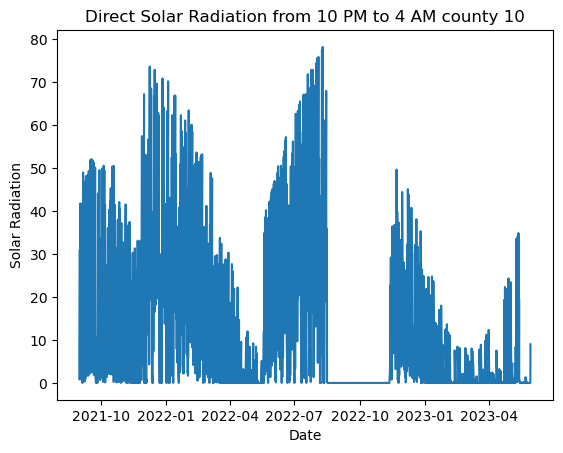

In [42]:
#outliers discovered
weather_10 =merge_weather[merge_weather['county'] == 10]
weather_10_midnight_to_6am = weather_10[ (weather_10['datetime'].dt.hour < 4) | (weather_10['datetime'].dt.hour > 22)]
weather_10_midnight_to_6am 
plt.plot(weather_10_midnight_to_6am['datetime'], weather_10_midnight_to_6am['direct_solar_radiation'])
plt.title('Direct Solar Radiation from 10 PM to 4 AM county 10')
plt.xlabel('Date')  # Adds a label to the x-axis
plt.ylabel('Solar Radiation')  # Adds a label to the y-axis
plt.show()

In [43]:
merge_step3 = pd.merge(merge_step2_nona, merge_weather,
                       left_on=['datetime','county'],
                       right_on=['datetime','county'],
                       how='left')

In [45]:
merge_step3.isna().sum()

county                           0
is_business                      0
product_type                     0
target                           0
is_consumption                   0
datetime                         0
row_id                           0
prediction_unit_id               0
eic_count                        0
installed_capacity               0
forecast_date_electricity        0
date_y                           0
euros_per_mwh                    0
lowest_price_per_mwh             0
highest_price_per_mwh            0
temperature                  30516
dewpoint                     30516
rain                         30516
snowfall                     30516
surface_pressure             30516
cloudcover_total             30516
cloudcover_low               30516
cloudcover_mid               30516
cloudcover_high              30516
windspeed_10m                30516
winddirection_10m            30516
shortwave_radiation          30516
direct_solar_radiation       30516
diffuse_radiation   

In [46]:
#dropped data
print(merge_step3.isna().sum()[-1]/len(merge_step3)*100)

1.517214085490211


In [47]:
merge_step3_nona = merge_step3.dropna()

In [49]:
print(merge_step1.shape)
print(merge_step3_nona.shape)

(2018352, 13)
(1980802, 29)


In [50]:
print((merge_step1.shape[0]-merge_step3_nona.shape[0])/merge_step1.shape[0]*100)

1.8604287061919824


/var/folders/d0/y80mlsk526nbkcmm57mgpfyr0000gn/T/ipykernel_70615/1535801435.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumption_data['datetime'] = pd.to_datetime(consumption_data['datetime'])


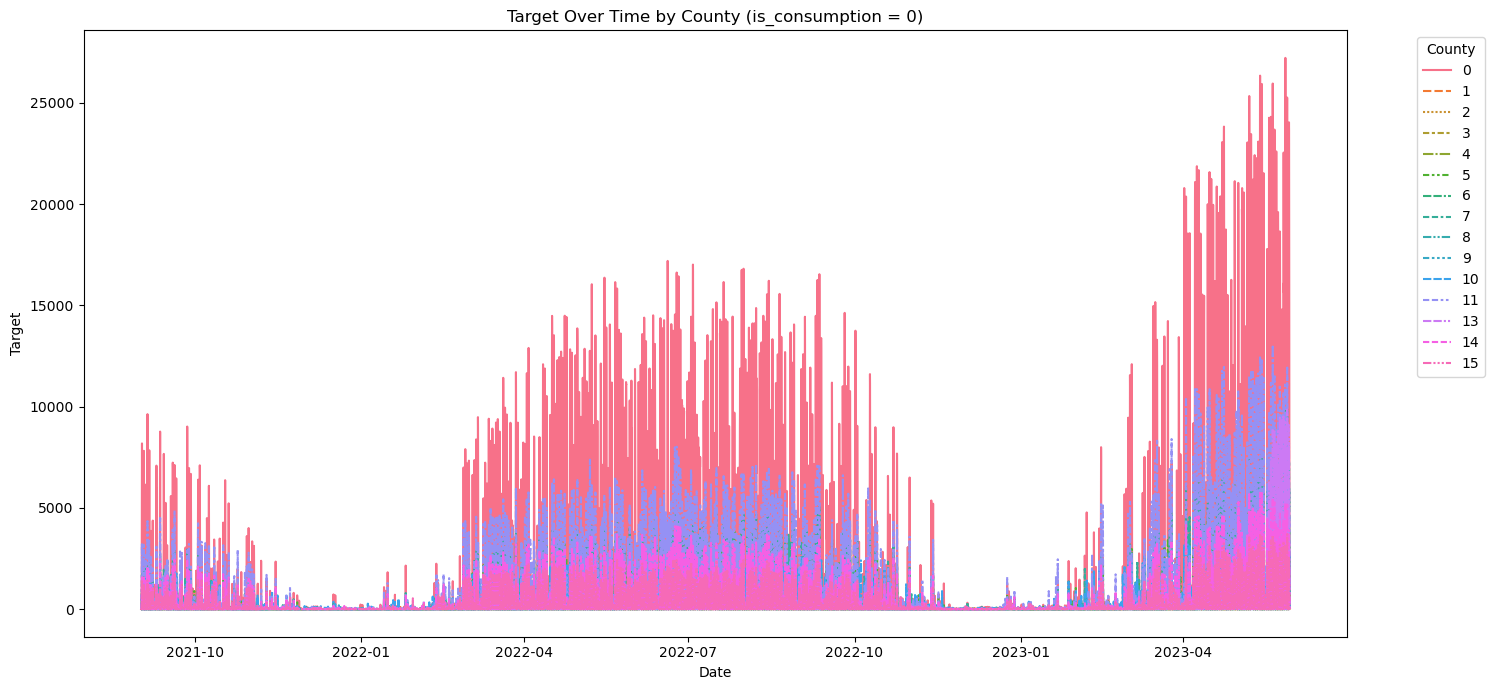

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned data

cleaned_data = merge_step3_nona

# Filter the dataset where is_consumption is 0
consumption_data = cleaned_data[cleaned_data['is_consumption'] == 0]

# Convert 'datetime' column to pandas datetime format
consumption_data['datetime'] = pd.to_datetime(consumption_data['datetime'])

# Set 'datetime' column as the index
consumption_data.set_index('datetime', inplace=True)

# Group the data by 'datetime' and 'county', and sum the 'target' value
target_over_time = consumption_data.groupby([consumption_data.index, 'county']).agg({'target': 'sum'}).reset_index()

# Pivot the table to get 'datetime' as index, columns as 'county', and 'target' as values
target_pivot = target_over_time.pivot(index='datetime', columns='county', values='target').fillna(0)

# Plotting target over time for all counties where is_consumption is 0
plt.figure(figsize=(15, 7))
sns.lineplot(data=target_pivot)
plt.title('Target Over Time by County (is_consumption = 0)')
plt.xlabel('Date')
plt.ylabel('Target')
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


/var/folders/d0/y80mlsk526nbkcmm57mgpfyr0000gn/T/ipykernel_70615/3983240732.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumption_data['datetime'] = pd.to_datetime(consumption_data['datetime'])


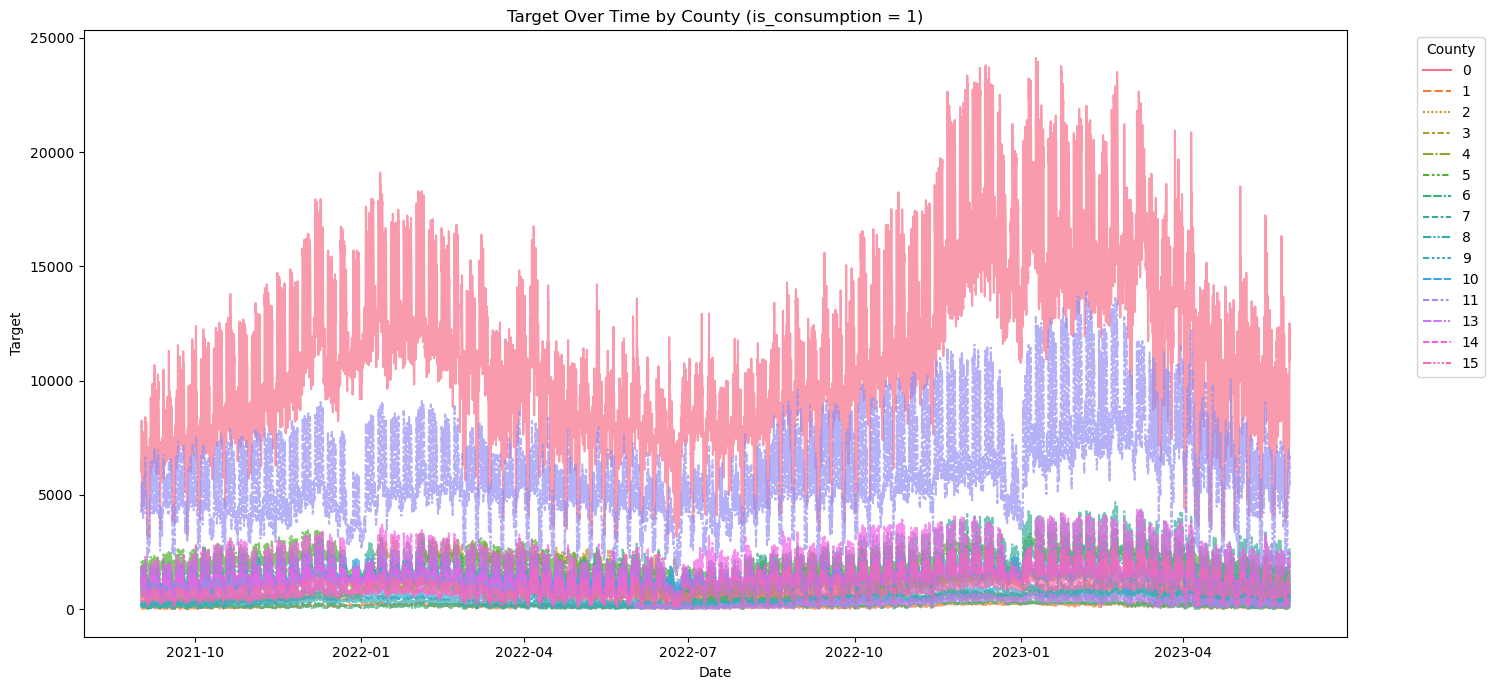

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned data

cleaned_data = merge_step3_nona

# Filter the dataset where is_consumption is 0
consumption_data = cleaned_data[cleaned_data['is_consumption'] == 1]

# Convert 'datetime' column to pandas datetime format
consumption_data['datetime'] = pd.to_datetime(consumption_data['datetime'])

# Set 'datetime' column as the index
consumption_data.set_index('datetime', inplace=True)

# Group the data by 'datetime' and 'county', and sum the 'target' value
target_over_time = consumption_data.groupby([consumption_data.index, 'county']).agg({'target': 'sum'}).reset_index()

# Pivot the table to get 'datetime' as index, columns as 'county', and 'target' as values
target_pivot = target_over_time.pivot(index='datetime', columns='county', values='target').fillna(0)

# Plotting target over time for all counties where is_consumption is 0
plt.figure(figsize=(15, 7))
sns.lineplot(data=target_pivot, alpha=0.7)
plt.title('Target Over Time by County (is_consumption = 1)')
plt.xlabel('Date')
plt.ylabel('Target')
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


In [54]:
merge_step3_nona['datetime'] = pd.to_datetime(merge_step3_nona['datetime'])

# Set hours during which radiation is to be set to zero
start_hour = 22
end_hour = 4

# Function to check if the time is between 22:00 and 04:00
def is_night_time(hour):
    return hour >= start_hour or hour < end_hour

merge_step3_nona.loc[merge_step3_nona['datetime'].dt.hour.apply(is_night_time), ['shortwave_radiation', 'direct_solar_radiation', 'diffuse_radiation']] = 0

/var/folders/d0/y80mlsk526nbkcmm57mgpfyr0000gn/T/ipykernel_70615/754819555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_step3_nona['datetime'] = pd.to_datetime(merge_step3_nona['datetime'])


In [57]:
merge_step3_nona.isna().sum()

county                       0
is_business                  0
product_type                 0
target                       0
is_consumption               0
datetime                     0
row_id                       0
prediction_unit_id           0
eic_count                    0
installed_capacity           0
forecast_date_electricity    0
date_y                       0
euros_per_mwh                0
lowest_price_per_mwh         0
highest_price_per_mwh        0
temperature                  0
dewpoint                     0
rain                         0
snowfall                     0
surface_pressure             0
cloudcover_total             0
cloudcover_low               0
cloudcover_mid               0
cloudcover_high              0
windspeed_10m                0
winddirection_10m            0
shortwave_radiation          0
direct_solar_radiation       0
diffuse_radiation            0
dtype: int64